### Principles of Machine Learning
##### Student Name:- Sahil Chitnis 
##### Class:- MSc Data Analytics
##### Student ID:-  23100637

In [57]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from numpy import absolute
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

### Checking if there are any missing values or not

In [71]:
Insurance_dataset_Train_df=pd.read_csv(r'D:\University of galway\CT5165(Principles of Machine Learning)\Assignments\Assignment_3_Data\train.csv')

Insurance_dataset_Test_df=pd.read_csv(r'D:\University of galway\CT5165(Principles of Machine Learning)\Assignments\Assignment_3_Data\test.csv')

# No null values are present in the train dataset. But by looking at the dataset it can be seen that smoker, region and sex attributes 
# are categorical values as the Datatype is object. 

Insurance_dataset_Train_df.info()
Insurance_dataset_Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1238 non-null   int64  
 1   sex       1238 non-null   object 
 2   bmi       1238 non-null   float64
 3   children  1238 non-null   int64  
 4   smoker    1238 non-null   object 
 5   region    1238 non-null   object 
 6   charges   1238 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 67.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       100 non-null    int64  
 1   sex       100 non-null    object 
 2   bmi       100 non-null    float64
 3   children  100 non-null    int64  
 4   smoker    100 non-null    object 
 5   region    100 non-null    object 
 6   charges   0 non-null      float64
dtypes: float64(2), int64(

### Pre-Processing the dataset for both the test and train dataset

In [72]:
# Here I have used label Encoding to encode the categorical values.

scaler = MinMaxScaler()

LE=LabelEncoder()

# Encoding For train dataset

Insurance_dataset_Train_df.sex = LE.fit_transform(Insurance_dataset_Train_df.sex)
Insurance_dataset_Train_df.smoker=LE.fit_transform(Insurance_dataset_Train_df.smoker)
Insurance_dataset_Train_df.region=LE.fit_transform(Insurance_dataset_Train_df.region)
Insurance_dataset_Train_df.bmi = scaler.fit_transform(Insurance_dataset_Train_df[['bmi']])
#Insurance_dataset_Train_df.age = scaler.fit_transform(Insurance_dataset_Train_df[['age']])


# #Encoding for test dataset
Insurance_dataset_Test_df.sex = LE.fit_transform(Insurance_dataset_Test_df.sex)
Insurance_dataset_Test_df.smoker =LE.fit_transform(Insurance_dataset_Test_df.smoker)
Insurance_dataset_Test_df.region =LE.fit_transform(Insurance_dataset_Test_df.region)
Insurance_dataset_Test_df.bmi = scaler.fit_transform(Insurance_dataset_Test_df[['bmi']])
#Insurance_dataset_Test_df.age = scaler.fit_transform(Insurance_dataset_Test_df[['age']])

Insurance_dataset_Train_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,0.326051,0,1,3,16884.92400
1,18,1,0.486346,1,0,2,1725.55230
2,28,1,0.465319,3,0,2,4449.46200
3,33,1,0.184189,0,0,1,21984.47061
4,32,1,0.352813,0,0,1,3866.85520


<Axes: >

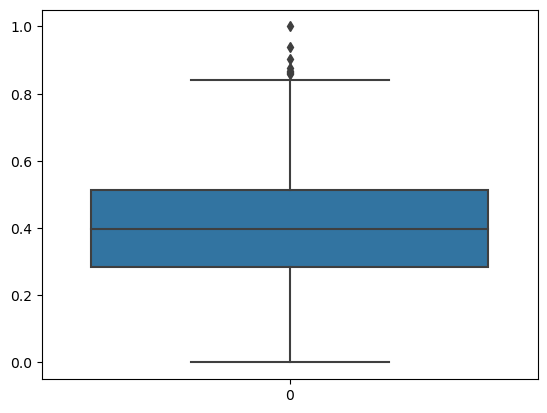

In [73]:
# There are outliers in the dataset which need to be removed to do this I have used IQR method.
import seaborn as sns
sns.boxplot(Insurance_dataset_Train_df['bmi'])

In [74]:
Q1 = Insurance_dataset_Train_df['bmi'].quantile(0.25)
Q3 = Insurance_dataset_Train_df['bmi'].quantile(0.75)
IQR = Q3 - Q1

Insurance_dataset_Train_df = Insurance_dataset_Train_df[~((Insurance_dataset_Train_df['bmi'] < (Q1 - 1.5 * IQR)) | (Insurance_dataset_Train_df['bmi'] > (Q3 + 1.5 * IQR)))]


Insurance_dataset_Train_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,0.326051,0,1,3,16884.92400
1,18,1,0.486346,1,0,2,1725.55230
2,28,1,0.465319,3,0,2,4449.46200
3,33,1,0.184189,0,0,1,21984.47061
4,32,1,0.352813,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1233,58,1,0.200437,0,0,3,11345.51900
1234,45,0,0.324140,2,0,2,8515.75870
1235,26,1,0.412480,0,0,1,2699.56835
1236,63,0,0.155653,0,0,0,14449.85440


<Axes: >

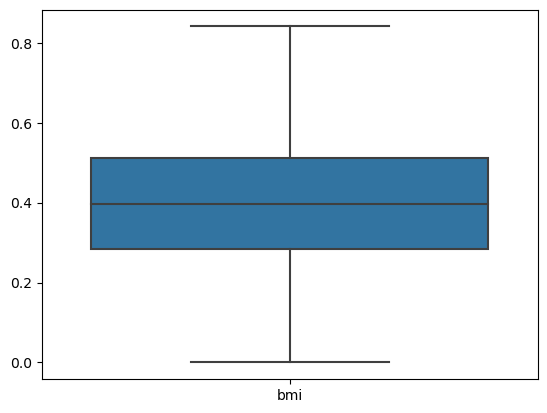

In [75]:
sns.boxplot(Insurance_dataset_Train_df[['bmi']])

### Visualization of individual attributes to understand the dataset

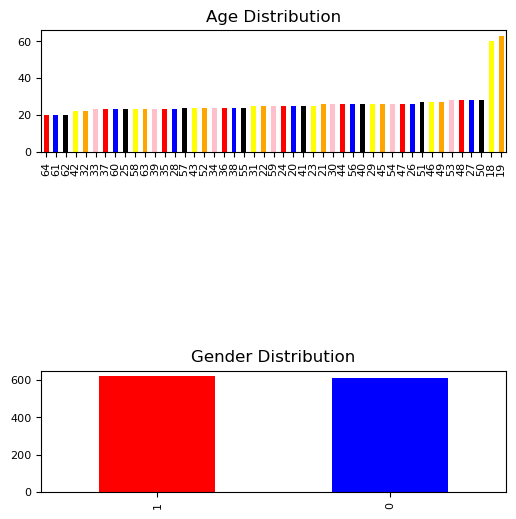

In [76]:
# Based on the visualization the dataset contains approximately 64 values of people who are aged 19 and simarlily for other age
# groups. Moreover, there are slightly more number of male genders than female.

fig, axarr = plt.subplots(2, 1, figsize=(6, 6))
c = ['red', 'blue', 'black', 'yellow', 'orange','pink']

Insurance_dataset_Train_df['age'].value_counts().sort_values().plot.bar(
    ax=axarr[0],fontsize=8,color=c
)
axarr[0].set_title("Age Distribution", fontsize=12)


Insurance_dataset_Train_df['sex'].value_counts().plot.bar(
    ax=axarr[1],fontsize=8, color=c
)
axarr[1].set_title("Gender Distribution", fontsize=12)

plt.subplots_adjust(hspace=1.8)

Text(0.5, 1.0, 'BMI Distribution')

<Figure size 600x600 with 0 Axes>

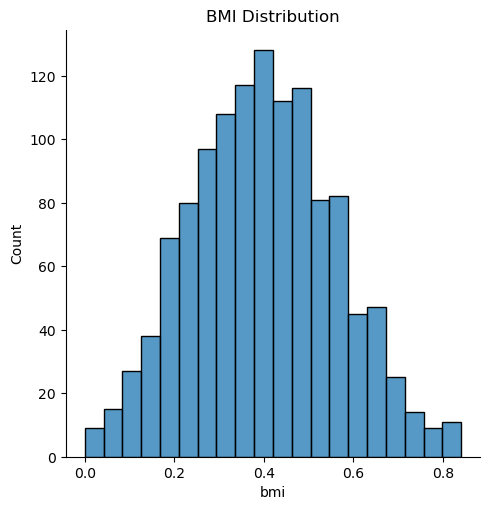

In [77]:
# Below  graph shows that the BMI is having a normal distribution and people who are aged 30 are having more BMI and the count
# is more than 120. The normal BMI range for both men and women is 18.5 to 24.9, but it can be seen that more number of people 
# aged 25 to 37 are overweight which will increase the insurance cost that they can get.

plt.figure(figsize=(6,6))
sns.displot(Insurance_dataset_Train_df['bmi'])
plt.title("BMI Distribution")

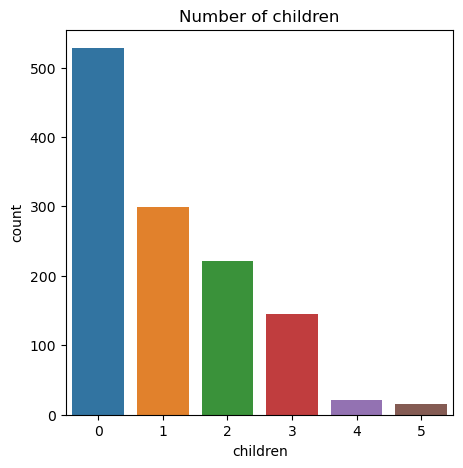

In [78]:
# There count of people who are not having any children is the highest.
plt.figure(figsize=(5,5)) 
sns.countplot(x='children', data=Insurance_dataset_Train_df)
plt.title('Number of children')
plt.show()

Text(0.5, 1.0, 'Charges Distribution')

<Figure size 600x600 with 0 Axes>

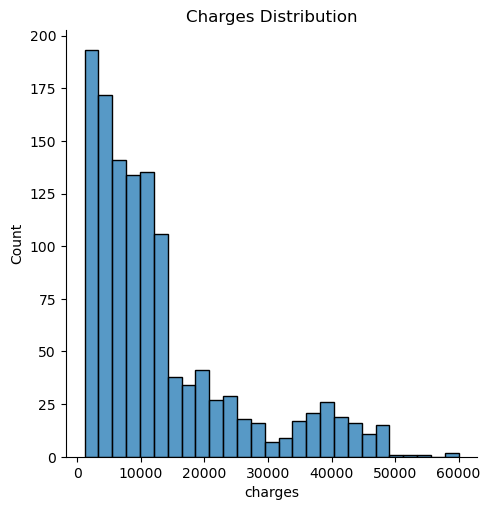

In [79]:
# The density of the insurance charges is highest at $10,000 which says that it is a common charge. Moreover, it can be seen that
# as the insurance charges distribution is right skewed.


plt.figure(figsize=(6,6))
sns.displot(Insurance_dataset_Train_df['charges'])
plt.title("Charges Distribution")

### Data Splitting into Train and Test Dataset after preprocessing.

In [95]:
X= Insurance_dataset_Train_df.drop(['charges'],axis = 1).values
y= Insurance_dataset_Train_df['charges'].values.reshape(-1, 1)
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Doing Cross validation and Training the Random Forest Regressor model 

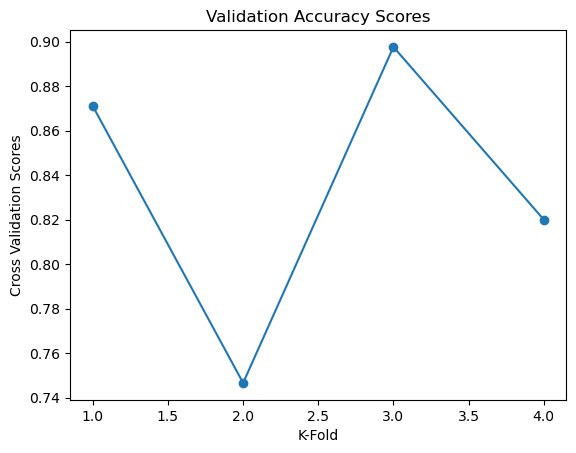

Mean MSE: 23787362.024386678
Mean R2: 0.8296356088451038


In [96]:
kval = 4
kfold = KFold(n_splits=kval, shuffle=True, random_state=42)

MSE_scores = []
R2_scores = []

rf = RandomForestRegressor(random_state=42)

for a, b in kfold.split(X):
    X_train, X_test = X[a], X[b]  
    y_train, y_test = y[a], y[b]

    rf.fit(X_train, y_train)
    RF_reg_preds = rf.predict(X_test)

    scores = cross_val_score(estimator = rf, X = X_test, y = y_test, cv=kfold)
    mse_val = mean_squared_error(y_test, RF_reg_preds)
    MSE_scores.append(mse_val)
    R2_val = r2_score(y_test, RF_reg_preds)
    R2_scores.append(R2_val)
    
plt.plot(range(1, kval + 1), scores, marker='o')
plt.title('Validation Accuracy Scores')
plt.xlabel('K-Fold')
plt.ylabel('Cross Validation Scores')
plt.show()

avg_mse_scores = np.mean(MSE_scores)
avg_r2_scores  = np.mean(R2_scores)
print('Mean MSE:',avg_mse_scores)
print('Mean R2:', avg_r2_scores)

### Linear Regressor Vs Random Forest Regressor

In [107]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

y_test=y_test.flatten()

y_pred1 = lr.predict(X_test).flatten()
RF_reg_preds = rf.predict(X_test).flatten()



In [108]:
df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'rf':RF_reg_preds})

In [109]:
df1

,Actual,Lr,rf
0,1725.55230,3822.686797,4200.233541
1,6406.41070,8898.299174,11448.940869
2,11090.71780,14961.433978,11169.633903
3,39611.75770,31993.633467,39561.074525
4,10797.33620,12536.849585,15820.513404
...,...,...,...
302,41661.60200,34339.959952,42282.678825
303,4718.20355,3976.768581,6414.427631
304,6593.50830,6826.448991,7429.053659
305,7162.01220,11600.256394,8177.628212


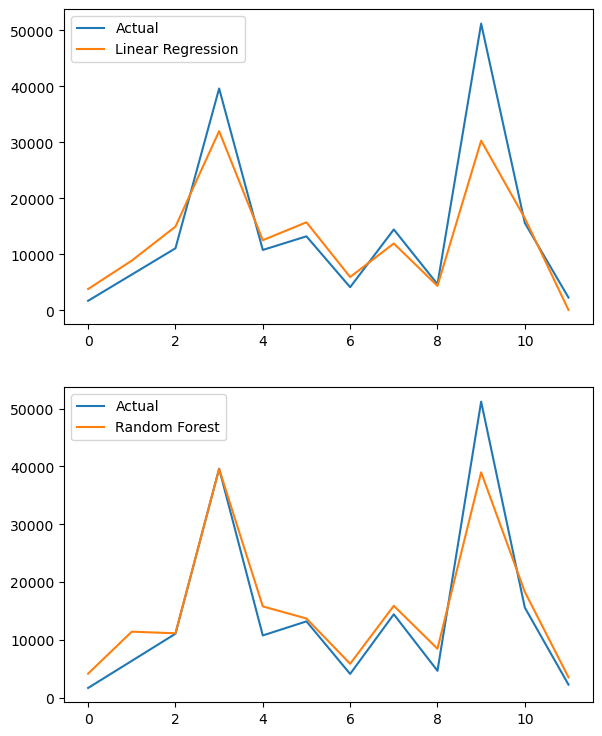

In [111]:
fig, ax = plt.subplots(2, 1, figsize=(15,9))
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:12],label='Actual')
plt.plot(df1['Lr'].iloc[0:12],label="Linear Regression")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:12],label='Actual')
plt.plot(df1['rf'].iloc[0:12],label="Random Forest")
plt.legend()



plt.legend()

In [1455]:
X_test = Insurance_dataset_Test_df.drop('charges', axis=1)
y_test = Insurance_dataset_Test_df['charges']

y_test = rf.predict(X_test)

#Total Final price of insurance cost for new employees
tot_final_price = y_test.sum().round(2)
print(f'Final Price of insurance cost for new employees: {tot_final_price}')

#Overall Cost for new and old Employees
tot_cost_old_emp = 16410282.7
overall_insurace_cost = (tot_cost_old_emp + tot_final_price).round(2)
print(f'The overall insurace cost incurred: {overall_insurace_cost}')

Final Price of insurance cost for new employees: 1303485.84
The overall insurace cost incurred: 17713768.54
